In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 91% 149M/163M [00:00<00:00, 134MB/s]
100% 163M/163M [00:01<00:00, 165MB/s]


In [10]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [11]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [13]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_79.jpg', 'with_mask_1884.jpg', 'with_mask_1151.jpg', 'with_mask_1138.jpg', 'with_mask_1249.jpg']
['with_mask_86.jpg', 'with_mask_2125.jpg', 'with_mask_25.jpg', 'with_mask_2353.jpg', 'with_mask_1863.jpg']


In [14]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3700.jpg', 'without_mask_607.jpg', 'without_mask_2167.jpg', 'without_mask_3253.jpg', 'without_mask_1207.jpg']
['without_mask_1440.jpg', 'without_mask_961.jpg', 'without_mask_729.jpg', 'without_mask_2048.jpg', 'without_mask_3027.jpg']


In [15]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [16]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [17]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [18]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [19]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


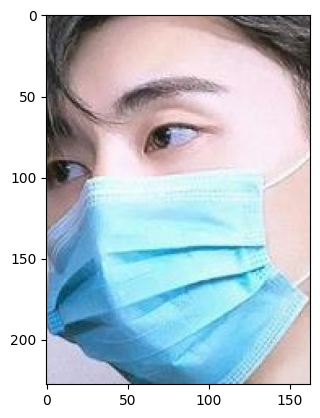

In [20]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

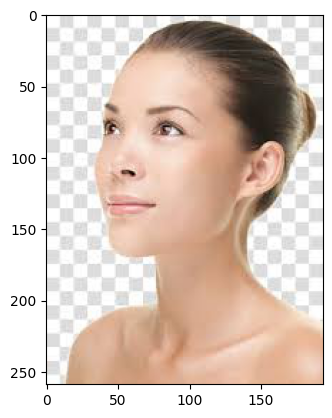

In [23]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [24]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [25]:
type(data)

list

In [26]:
len(data)

7553

In [27]:
data[0]

array([[[180, 162, 138],
        [170, 152, 131],
        [164, 145, 128],
        ...,
        [107,  95, 105],
        [109,  97, 107],
        [109,  97, 107]],

       [[175, 157, 136],
        [165, 146, 127],
        [160, 141, 125],
        ...,
        [106,  94, 104],
        [108,  96, 106],
        [108,  96, 106]],

       [[169, 151, 135],
        [162, 143, 128],
        [159, 139, 127],
        ...,
        [107,  95, 105],
        [107,  95, 105],
        [107,  95, 105]],

       ...,

       [[ 68,  65,  75],
        [ 68,  66,  75],
        [ 67,  66,  74],
        ...,
        [195, 184, 159],
        [197, 186, 160],
        [197, 186, 160]],

       [[ 70,  67,  78],
        [ 70,  68,  79],
        [ 68,  66,  77],
        ...,
        [196, 186, 161],
        [198, 188, 162],
        [198, 189, 162]],

       [[ 72,  69,  80],
        [ 72,  70,  81],
        [ 69,  67,  78],
        ...,
        [198, 191, 164],
        [198, 191, 163],
        [196, 189, 161]]

In [28]:
type(data[0])

numpy.ndarray

In [29]:
data[0].shape

(128, 128, 3)

In [30]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [31]:
type(X)

numpy.ndarray

In [32]:
type(Y)

numpy.ndarray

In [33]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [34]:
print(Y)

[1 1 1 ... 0 0 0]


In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [37]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [38]:
X_train[0]

array([[[ 85,  58,  41],
        [ 72,  46,  29],
        [ 68,  42,  26],
        ...,
        [141, 146, 135],
        [141, 150, 139],
        [139, 149, 138]],

       [[ 75,  49,  32],
        [ 76,  49,  32],
        [ 77,  52,  36],
        ...,
        [136, 140, 130],
        [141, 147, 137],
        [143, 151, 140]],

       [[ 70,  44,  27],
        [ 77,  50,  33],
        [ 73,  48,  32],
        ...,
        [126, 126, 115],
        [134, 137, 126],
        [138, 143, 131]],

       ...,

       [[ 46,  31,  24],
        [ 51,  36,  29],
        [ 54,  39,  32],
        ...,
        [ 47,  33,  26],
        [ 51,  35,  28],
        [ 54,  37,  29]],

       [[ 48,  33,  26],
        [ 52,  37,  30],
        [ 56,  41,  34],
        ...,
        [ 50,  36,  28],
        [ 53,  37,  30],
        [ 53,  36,  28]],

       [[ 47,  30,  23],
        [ 50,  33,  26],
        [ 54,  37,  30],
        ...,
        [ 49,  35,  27],
        [ 54,  38,  31],
        [ 53,  38,  31]]

In [39]:
X_train_scaled[0]

array([[[0.33333333, 0.22745098, 0.16078431],
        [0.28235294, 0.18039216, 0.11372549],
        [0.26666667, 0.16470588, 0.10196078],
        ...,
        [0.55294118, 0.57254902, 0.52941176],
        [0.55294118, 0.58823529, 0.54509804],
        [0.54509804, 0.58431373, 0.54117647]],

       [[0.29411765, 0.19215686, 0.1254902 ],
        [0.29803922, 0.19215686, 0.1254902 ],
        [0.30196078, 0.20392157, 0.14117647],
        ...,
        [0.53333333, 0.54901961, 0.50980392],
        [0.55294118, 0.57647059, 0.5372549 ],
        [0.56078431, 0.59215686, 0.54901961]],

       [[0.2745098 , 0.17254902, 0.10588235],
        [0.30196078, 0.19607843, 0.12941176],
        [0.28627451, 0.18823529, 0.1254902 ],
        ...,
        [0.49411765, 0.49411765, 0.45098039],
        [0.5254902 , 0.5372549 , 0.49411765],
        [0.54117647, 0.56078431, 0.51372549]],

       ...,

       [[0.18039216, 0.12156863, 0.09411765],
        [0.2       , 0.14117647, 0.11372549],
        [0.21176471, 0

In [40]:
import tensorflow as tf
from tensorflow import keras

In [41]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [42]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [43]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 15s 21ms/step - loss: 0.4603 - acc: 0.8001 - val_loss: 0.2715 - val_acc: 0.8909
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2825 - acc: 0.8871 - val_loss: 0.2012 - val_acc: 0.9174
Epoch 3/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2443 - acc: 0.9033 - val_loss: 0.2008 - val_acc: 0.9223
Epoch 4/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1912 - acc: 0.9251 - val_loss: 0.2322 - val_acc: 0.9140
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1655 - acc: 0.9382 - val_loss: 0.1459 - val_acc: 0.9455


In [44]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.1887 - acc: 0.9332
Test Accuracy = 0.9331568479537964


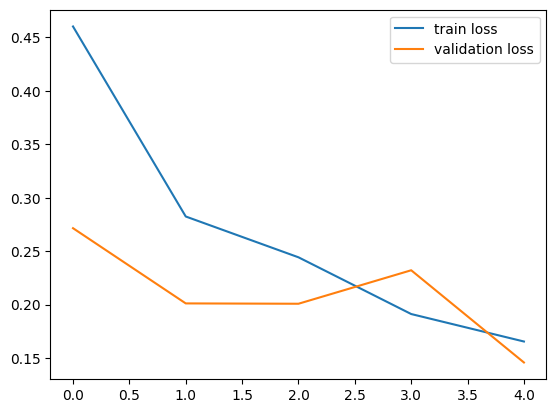

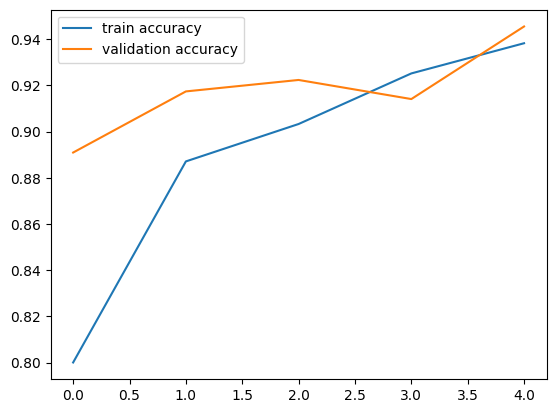

In [45]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')